### Upload do arquivo csv

In [1]:
from google.colab import files
uploaded = files.upload()

Saving bostonbin.csv to bostonbin.csv


### Importando bibliotecas

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


### Função de Suporte



### Carregando Dataset

In [43]:
data = pd.read_csv("bostonbin.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
lr = SVC()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83        62
         1.0       0.89      0.87      0.88        90

    accuracy                           0.86       152
   macro avg       0.85      0.85      0.85       152
weighted avg       0.86      0.86      0.86       152



In [36]:
y_test.shape

(152,)

### Holdout e Normalização

In [11]:
X_train_orig = X_train.copy()
X_test_orig = X_test.copy()
y_train_orig = y_train.copy()
y_test_orig = y_test.copy()

## Definindo hiperparâmetros

In [8]:
param_grid_svm = {
    'C': [2**i for i in range(-5, 16, 2)],
    'gamma': [2**i for i in range(-15, 4)],
}

param_grid_dt = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'criterion': ['gini']
}

## K-Fold

In [9]:
kf = KFold(n_splits=10)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Código para SVM

In [17]:
best_score_svm = 0
best_params_svm = {}

for C in param_grid_svm['C']:
    for gamma in param_grid_svm['gamma']:
        scores = []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            model = SVC(C=C, gamma=gamma)
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            scores.append(score)

        average_score = np.mean(scores)

        if average_score > best_score_svm:
            best_score_svm = average_score
            best_params_svm = {'C': C, 'gamma': gamma}

print("Hiperparâmetros selecionados para SVM:", best_params_svm)

Hiperparâmetros selecionados para SVM: {'C': 2, 'gamma': 0.03125}


In [24]:
svm_model = SVC(C=32768, gamma=0.0078125)
# svm_model.fit(X_train, y_train)
svm_model.fit(X_train_orig, y_train_orig)

y_pred_svm = svm_model.predict(X_test_orig)

cm = confusion_matrix(y_test_orig, y_pred_svm)


TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
F1_score = 2 * (precision * recall) / (precision + recall)

In [25]:
metrics_svm = pd.DataFrame({
    'Metrica': ['Accuracy', 'Recall', 'Precision', 'F1_score'],
    'Valor': [accuracy, recall, precision, F1_score]
})
metrics_svm.style.set_caption('Support Vector Machine')

,Metrica,Valor
0,Accuracy,0.680000
1,Recall,0.857143
2,Precision,0.461538
3,F1_score,0.600000


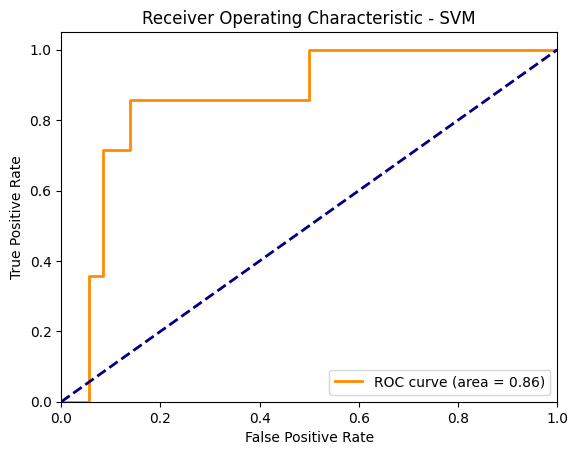

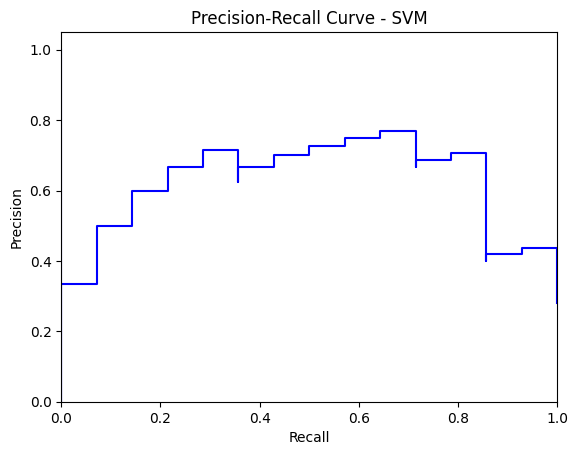

In [ ]:
y_score_svm = svm_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score_svm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc='lower right')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_score_svm)
plt.figure()
plt.step(recall, precision, color='b', where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve - SVM')
plt.show()

## Código para Decision Tree

In [ ]:

best_score_dt = 0
best_params_dt = {}



for max_depth in param_grid_dt['max_depth']:
    for min_samples_leaf in param_grid_dt['min_samples_leaf']:
        for criterion in param_grid_dt['criterion']:
            scores = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]

                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)


                model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, criterion=criterion)
                model.fit(X_train, y_train)
                score = model.score(X_test, y_test)
                scores.append(score)

            average_score = np.mean(scores)

            if average_score > best_score_dt:
                best_params_dt = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'criterion': criterion}

print("Melhor combinação de hiperparâmetros para Árvore de Decisão:", best_params_dt)

Melhor combinação de hiperparâmetros para Árvore de Decisão: {'max_depth': 10, 'min_samples_leaf': 5, 'criterion': 'gini'}


In [ ]:
dt_model = DecisionTreeClassifier(max_depth=best_params_dt['max_depth'], min_samples_leaf=best_params_dt['min_samples_leaf'], criterion=best_params_dt['criterion'])
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_dt)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
F1_score = 2 * (precision * recall) / (precision + recall)

In [ ]:
metrics_dt = pd.DataFrame({
    'Metrica': ['Accuracy', 'Recall', 'Precision', 'F1_score'],
    'Valor': [accuracy, recall, precision, F1_score]
})
metrics_dt.style.set_caption('Decision Tree')

,Metrica,Valor
0,Accuracy,0.620000
1,Recall,0.428571
2,Precision,0.352941
3,F1_score,0.387097


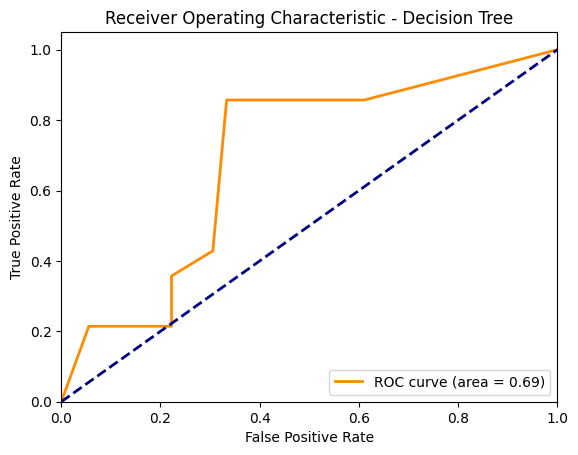

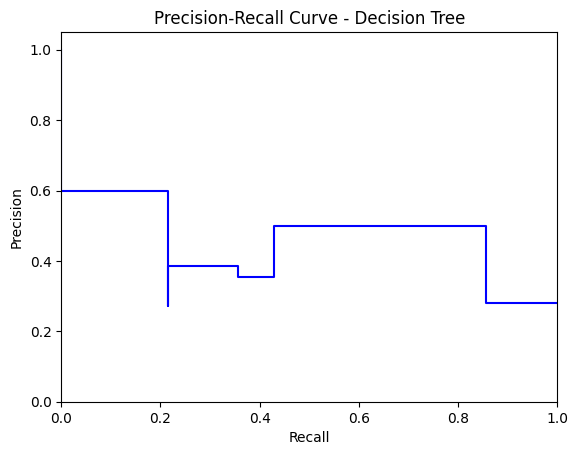

In [ ]:
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc='lower right')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob_dt)
plt.figure()
plt.step(recall, precision, color='b', where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve - Decision Tree')
plt.show()